In [3]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
TRAIN_DIR = '/content/drive/MyDrive/CVPR/CIFAR-10-images-master/CIFAR-10-images-master/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['deer', 'bird', 'cat', 'automobile', 'truck', 'dog', 'frog', 'horse', 'ship', 'airplane']


In [ ]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

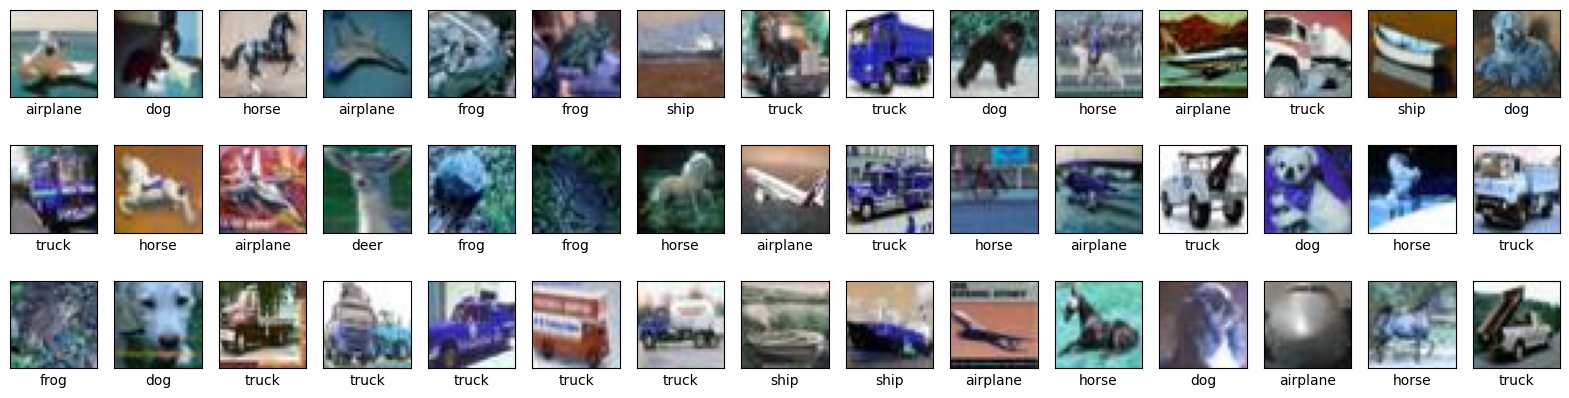

In [6]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,5))

for i in range(45):
    plt.subplot(3,15,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==45:
        break
plt.show()

In [30]:
f0 = TRAIN_DATA[0:10000]
f1 = TRAIN_DATA[10000:20000]
f2 = TRAIN_DATA[20000:30000]
f3 = TRAIN_DATA[30000:40000]
f4 = TRAIN_DATA[40000:50000]

print(len(f1), len(f4))

10000 0


In [38]:
def L1_distance(img1, img2):
    return np.sum(np.abs(img1 - img2))

def L2_distance(img1, img2):
    return np.sqrt(np.sum(np.square(img1 - img2)))

def KNN(test_img, train_set, k, distance):
    distances_labels = []
    for train_img, label in train_set:
        if distance == "L1":
            dist = L1_distance(test_img, train_img)
        elif distance == "L2":
            dist = L2_distance(test_img, train_img)
        else:
            raise ValueError("Invalid distance metric")
        distances_labels.append((dist, label))
    distances_labels.sort(key=lambda x: x[0])
    neighbors = distances_labels[:k]
    counts = {}
    for _, label in neighbors:
        counts[label] = counts.get(label, 0) + 1
    prediction = max(counts, key=counts.get)
    return prediction

In [39]:
k_values = list(range(1, 6))

distance_metrics = ["L1", "L2"]

average_accuracy = {}

In [ ]:
for k in k_values:
    for distance in distance_metrics:
        accuracy_per_fold = []
        for i in range(5):
            test_set = globals()[f"f{i}"]
            train_set = []
            for j in range(5):
                if j != i:
                    train_set.extend(globals()[f"f{j}"])
            correct = 0
            for test_img, true_label in tqdm(test_set):
                pred_label = KNN(test_img, train_set, k, distance)
                if pred_label == true_label:
                    correct += 1
            accuracy = correct / len(test_set)
            accuracy_per_fold.append(accuracy)
        average_accuracy[(k, distance)] = np.mean(accuracy_per_fold)

print(average_accuracy)

In [ ]:
x_list = list(range(1, k_range+1))
plt.figure(figsize=(14, 6))

for fold in accuracies:
  y_list = fold[0]
  plt.scatter(x_list, y_list)
arr = []
for i in range(k_range):
  arr.append([fold[0][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]
plt.errorbar(x_list, trend,fmt='-o')
plt.title('L1 Distance')
plt.xticks(x_list)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

x_list = list(range(1, k_range+1))
plt.figure(figsize=(14, 6))

for fold in accuracies:
  y_list = fold[1]
  plt.scatter(x_list, y_list)
arr = []
for i in range(k_range):
  arr.append([fold[1][i] for fold in accuracies])
trend = [np.mean(a) for a in arr]
plt.errorbar(x_list, trend,fmt='-o')
plt.title('L2 Distance')
plt.xticks(x_list)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

Discussion:For Large amount of data I cannot found l1 and l2 distance graph.